## Submission Info
### Student Name: <span style="color:red">Colm</span>
### Student Surname: <span style="color:red">Kenny</span>
### Student ID: <span style="color:red">18225012</span>
### Date of Final Submission: <span style="color:red">16/10/2022</span>
***

## Introduction

In this e-tivity, I will be training and testing a machine learning model to predict the price of a bond. To do this, I must load and preprocess the dataset. There are specific requirements for a dataset to be suitably useful for a ML model. Once I have the finalised dataset I will select a model to train and test the model's prediction accuracy.


## The Dataset
The provided dataset covers bond trading operations (buy and sell) on a financial market. The data is labeled and provided in its raw format, so it needs to be preprocessed.   

In [1]:
import pandas as pd

url_dataset = "https://raw.githubusercontent.com/evassev/CS6501_SEM2_2022/main/Etivities/data/trade_combined.csv"
df = pd.read_csv(url_dataset)

df.head(10)

,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,...,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
0,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,334,10792.0,6549,129,D,13,5,OUTRIGHT
1,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,335,117793.0,6549,129,D,13,5,OUTRIGHT
2,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,325,119290.0,6549,129,D,13,5,OUTRIGHT
3,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,327,113852.0,6549,129,D,13,5,OUTRIGHT
4,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,337,117795.0,6549,129,D,13,5,OUTRIGHT
5,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,325,119752.0,7019,277,D,13,4,OUTRIGHT
6,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,336,117794.0,7019,277,D,13,4,OUTRIGHT
7,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,323,117786.0,7019,277,D,13,4,OUTRIGHT
8,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,337,117795.0,7019,277,D,13,4,OUTRIGHT
9,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,SELL,600000,...,1,1,335,117793.0,11532,177,D,13,4,OUTRIGHT


# Step 1: Determine the ML Model: Supervised-Classification, Supervised-Regression, or Unsupervised ML Model

The best way to find the most suitable ML model is to look at the dependent variable in question. In this example, the y variable is continous, we are looking to predict this variable using a list of x independent variables. I will use a linear regression ML model to be used to predict the price of a bond. Regression is a supervised ML technique primarily used to predict a continuous y variable from x independent variables, making it perfect for price predictions.

# Step 2: Data Preprocessing




## Step 2.1: Specifics of the dataset

### Shape of dataset

In [2]:
print("Dataset Shape: %d tuples and %d variables" % (df.shape[0], df.shape[1]))

Dataset Shape: 20000 tuples and 27 variables


There are 20,000 tuples in the dataset, consisting of 27 variables. This is sufficient observations to use for an ML algorithm, with a training/validation set.


### Data features

In [3]:
list(df.columns.values)

['NoRelatedSym',
 'Symbol',
 'SymbolSfx',
 'SecurityID',
 'SecurityIDSource',
 'SecurityType',
 'MaturityDate',
 'IssueDate',
 'Side',
 'OrderQty',
 'SettlDate',
 'Currency',
 'OrdType',
 'TransactTime',
 'Price',
 'PriceType',
 'Yield',
 'NoPartIDs',
 'PartyID',
 'DealerID',
 'DealerTraderID',
 'CustomerTraderID',
 'CustomerID',
 'PartyIDSource',
 'PartyRole',
 'DealerCount',
 'OrdSubType']

In [4]:
df.dtypes

NoRelatedSym          int64
Symbol               object
SymbolSfx            object
SecurityID          float64
SecurityIDSource      int64
SecurityType         object
MaturityDate         object
IssueDate            object
Side                 object
OrderQty              int64
SettlDate            object
Currency             object
OrdType               int64
TransactTime         object
Price               float64
PriceType             int64
Yield               float64
NoPartIDs             int64
PartyID               int64
DealerID              int64
DealerTraderID      float64
CustomerTraderID      int64
CustomerID            int64
PartyIDSource        object
PartyRole             int64
DealerCount           int64
OrdSubType           object
dtype: object

### The Dependent Variable - Price

In [5]:
df['Price'].describe()

count    18692.000000
mean       107.535666
std         14.445474
min          0.000000
25%         99.749750
50%        103.324500
75%        110.360500
max        174.278000
Name: Price, dtype: float64

<AxesSubplot:ylabel='Density'>

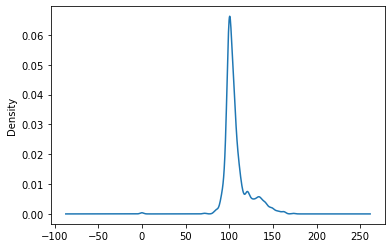

In [6]:
df['Price'].plot.density()

Looking at the density plot of price, the vast majority of bond prices hover around the $100 mark. There are little to no bonds less than $100 whereas there are a couple with values between $100 and $150.

## Step 2.2: Data Cleaning: Remove features with unique values for each row in the dataset

In [7]:
for column in df.columns:
    uniqueValues = df[column].unique()
    if len(uniqueValues) == len(df[column]):
        print("Column " + column + " has all unique values")

This for loop creates no output, therefore there are no variables with all unique values. No features are removed yet.

## Step 2.3: Data Cleaning: Remove features with one unique value for the entire dataset

In [8]:
for column in df.columns:
    uniqueValues = df[column].unique()
    if len(uniqueValues) == 1:
        print("Column " + column + " has 1 unique value for the dataset")

Column NoRelatedSym has 1 unique value for the dataset
Column SymbolSfx has 1 unique value for the dataset
Column SecurityIDSource has 1 unique value for the dataset
Column Currency has 1 unique value for the dataset
Column OrdType has 1 unique value for the dataset
Column PriceType has 1 unique value for the dataset
Column NoPartIDs has 1 unique value for the dataset
Column PartyID has 1 unique value for the dataset
Column PartyIDSource has 1 unique value for the dataset
Column PartyRole has 1 unique value for the dataset
Column OrdSubType has 1 unique value for the dataset


Now there is 11 features that have to be removed due to having only one unique value for the entire dataset.

In [9]:
for column in df.columns:
    uniqueValues = df[column].unique()
    if len(uniqueValues) == 1:
        df.drop(column, axis=1, inplace=True)
        print("Column " + column + " has been removed from the dataset")

Column NoRelatedSym has been removed from the dataset
Column SymbolSfx has been removed from the dataset
Column SecurityIDSource has been removed from the dataset
Column Currency has been removed from the dataset
Column OrdType has been removed from the dataset
Column PriceType has been removed from the dataset
Column NoPartIDs has been removed from the dataset
Column PartyID has been removed from the dataset
Column PartyIDSource has been removed from the dataset
Column PartyRole has been removed from the dataset
Column OrdSubType has been removed from the dataset


## Step 2.4: Data Cleaning: Remove records with null (NAN) values

In [10]:
print(df.isnull().sum())

Symbol                  0
SecurityID          13959
SecurityType            0
MaturityDate            0
IssueDate               0
Side                    0
OrderQty                0
SettlDate               0
TransactTime            0
Price                1308
Yield                1297
DealerID                0
DealerTraderID       1055
CustomerTraderID        0
CustomerID              0
DealerCount             0
dtype: int64


Now that we have identified which features have null values present, we can remove the tuples featuring a null value. We should be left with no null values left in any of the columns.

In [11]:
df = df.dropna()
print(df.isnull().sum())

Symbol              0
SecurityID          0
SecurityType        0
MaturityDate        0
IssueDate           0
Side                0
OrderQty            0
SettlDate           0
TransactTime        0
Price               0
Yield               0
DealerID            0
DealerTraderID      0
CustomerTraderID    0
CustomerID          0
DealerCount         0
dtype: int64


## Step 2.5: Data Transformation: Convert all non-numeric features to numeric

In [12]:
df.head()

,Symbol,SecurityID,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,TransactTime,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount
6204,135087D35,1657312.0,GOC,12/1/2048,6/2/2014 0:00,BUY,1000000,6/20/2018,14:39:50,111.140,2.243,334,113683.0,11570,454,4
6205,135087D35,1657312.0,GOC,12/1/2048,6/2/2014 0:00,BUY,1000000,6/20/2018,14:39:50,111.220,2.240,335,114347.0,11570,454,4
6206,135087H80,1657313.0,GOC,5/1/2020,2/9/2018 0:00,SELL,5000000,6/20/2018,14:40:12,99.760,1.881,323,118599.0,6753,204,1
6207,135087D35,1657317.0,GOC,12/1/2048,6/2/2014 0:00,BUY,1250000,6/20/2018,14:41:05,111.198,2.241,321,7177.0,6687,178,4
6208,135087D35,1657317.0,GOC,12/1/2048,6/2/2014 0:00,BUY,1250000,6/20/2018,14:41:05,111.130,2.244,327,7687.0,6687,178,4


In [13]:
import numpy as np
non_numeric = df.select_dtypes(exclude=np.number).columns.tolist()
print(non_numeric)

['Symbol', 'SecurityType', 'MaturityDate', 'IssueDate', 'Side', 'SettlDate', 'TransactTime']


In order to use our ML model, we have to remove or convert the above features to numeric. There are any ways we can achieve this.

In [14]:
df['Symbol'].describe()

count          5685
unique          304
top       135087ZS6
freq            250
Name: Symbol, dtype: object

The Symbol feature can be dropped as it is equal to the security ID feature, which is already in numeric format.

In [15]:
df.drop('Symbol', axis=1, inplace=True)
df.head()

,SecurityID,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,TransactTime,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount
6204,1657312.0,GOC,12/1/2048,6/2/2014 0:00,BUY,1000000,6/20/2018,14:39:50,111.140,2.243,334,113683.0,11570,454,4
6205,1657312.0,GOC,12/1/2048,6/2/2014 0:00,BUY,1000000,6/20/2018,14:39:50,111.220,2.240,335,114347.0,11570,454,4
6206,1657313.0,GOC,5/1/2020,2/9/2018 0:00,SELL,5000000,6/20/2018,14:40:12,99.760,1.881,323,118599.0,6753,204,1
6207,1657317.0,GOC,12/1/2048,6/2/2014 0:00,BUY,1250000,6/20/2018,14:41:05,111.198,2.241,321,7177.0,6687,178,4
6208,1657317.0,GOC,12/1/2048,6/2/2014 0:00,BUY,1250000,6/20/2018,14:41:05,111.130,2.244,327,7687.0,6687,178,4


In [16]:
df['SecurityType'].describe()

count     5685
unique       3
top        GOC
freq      3330
Name: SecurityType, dtype: object

In [17]:
security_type_values = df['SecurityType'].unique()
print(security_type_values)

['GOC' 'PROV' 'CMB']


There are 3 different values for the Security Type feature, we can convert this to numeric by mapping each value to a number; 1, 2 and 3. The same method can also be used for the Side feature, which features two values; BUY or SELL.

In [18]:
class_mapper = {}
num = 0
for element in security_type_values:
    num += 1
    class_mapper[element] = num

df['SecurityType'] = df['SecurityType'].replace(class_mapper)
print(df['SecurityType'].unique())

[1 2 3]


In [19]:
side_values = df['Side'].unique()
print(side_values)

['BUY' 'SELL']


In [20]:
class_mapper = {}
num = 0
for element in side_values:
    num += 1
    class_mapper[element] = num

df['Side'] = df['Side'].replace(class_mapper)

Now we must look at the date and time variables, which we can convert to numeric date/times by using the following code:

In [21]:
df['MaturityDate'] = pd.to_datetime(df['MaturityDate']).dt.strftime("%Y%m%d").astype(int)
df['IssueDate'] = pd.to_datetime(df['IssueDate']).dt.strftime("%Y%m%d").astype(int)
df['SettlDate'] = pd.to_datetime(df['SettlDate']).dt.strftime("%Y%m%d").astype(int)
df['TransactTime'] = pd.to_datetime(df['TransactTime']).dt.strftime("%Y%m%d").astype(int)
df.head(10)

,SecurityID,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,TransactTime,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount
6204,1657312.0,1,20481201,20140602,1,1000000,20180620,20221013,111.140,2.243,334,113683.0,11570,454,4
6205,1657312.0,1,20481201,20140602,1,1000000,20180620,20221013,111.220,2.240,335,114347.0,11570,454,4
6206,1657313.0,1,20200501,20180209,2,5000000,20180620,20221013,99.760,1.881,323,118599.0,6753,204,1
6207,1657317.0,1,20481201,20140602,1,1250000,20180620,20221013,111.198,2.241,321,7177.0,6687,178,4
6208,1657317.0,1,20481201,20140602,1,1250000,20180620,20221013,111.130,2.244,327,7687.0,6687,178,4
6209,1657317.0,1,20481201,20140602,1,1250000,20180620,20221013,111.190,2.241,334,113683.0,6687,178,4
6210,1657317.0,1,20481201,20140602,1,1250000,20180620,20221013,111.300,2.236,337,5168.0,6687,178,4
6211,1657324.0,1,20481201,20140602,1,1250000,20180620,20221013,111.180,2.241,321,7177.0,6687,178,4
6212,1657324.0,1,20481201,20140602,1,1250000,20180620,20221013,111.130,2.244,327,7687.0,6687,178,4
6213,1657324.0,1,20481201,20140602,1,1250000,20180620,20221013,111.150,2.243,334,113683.0,6687,178,4


In [22]:
non_numeric = df.select_dtypes(exclude=np.number).columns.tolist()
print(non_numeric)

[]


We are now left with a 100% numeric dataset which can be used to train and test our ML model.

# Step 3: Model Training and Testing

In [23]:
df.shape

(5685, 15)

In [24]:
df.head(10)

,SecurityID,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,TransactTime,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount
6204,1657312.0,1,20481201,20140602,1,1000000,20180620,20221013,111.140,2.243,334,113683.0,11570,454,4
6205,1657312.0,1,20481201,20140602,1,1000000,20180620,20221013,111.220,2.240,335,114347.0,11570,454,4
6206,1657313.0,1,20200501,20180209,2,5000000,20180620,20221013,99.760,1.881,323,118599.0,6753,204,1
6207,1657317.0,1,20481201,20140602,1,1250000,20180620,20221013,111.198,2.241,321,7177.0,6687,178,4
6208,1657317.0,1,20481201,20140602,1,1250000,20180620,20221013,111.130,2.244,327,7687.0,6687,178,4
6209,1657317.0,1,20481201,20140602,1,1250000,20180620,20221013,111.190,2.241,334,113683.0,6687,178,4
6210,1657317.0,1,20481201,20140602,1,1250000,20180620,20221013,111.300,2.236,337,5168.0,6687,178,4
6211,1657324.0,1,20481201,20140602,1,1250000,20180620,20221013,111.180,2.241,321,7177.0,6687,178,4
6212,1657324.0,1,20481201,20140602,1,1250000,20180620,20221013,111.130,2.244,327,7687.0,6687,178,4
6213,1657324.0,1,20481201,20140602,1,1250000,20180620,20221013,111.150,2.243,334,113683.0,6687,178,4


## Step 3.1: Select and Import a ML Algorithm


As mentioned previously, we will be using supervised regression for our ML model. 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Step 3.2: Train the ML Model

In [26]:
Y = df.iloc[:,8]
X = df.iloc[:,:8]

We have now prepared our X dataset and Y vector to be used in the model. Y contains only the Price feature, whereas X contains all other features in the preprocessed dataset. We will split the dataset into two; 80% of tuples will be used to train the model while the other 20% will be used to test the accuracy of the model.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor()

## Step 3.3: Test the ML Model

Powered by the training data, we can feed our test data into the model and cross-check the model's predictions with the actual prices in the test set. This is a very useful way of judging the accuracy of the model.

In [28]:
Y_pred = rf_regressor.predict(X_test)

### Predicted v Actual Scatter Plot

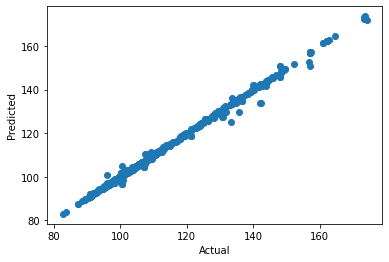

In [29]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Residual Plot

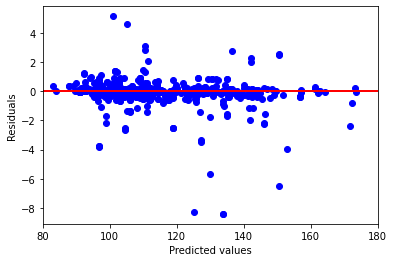

In [30]:
plt.scatter(Y_pred, Y_pred - Y_test, c='blue', marker='o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=80, xmax=180, lw=2, color='red')
plt.xlim([80, 180])
plt.show()

### Coefficient of Determination

In [31]:
from sklearn import metrics
print(metrics.r2_score(Y_test,Y_pred))

0.9975825391904152


The above output explains the correlation between the predicted and actual scores in the test dataset. The model uses the training dataset to feed values into the model and learn how to predict bond price values from the various features. The predicted values and actual values have a very strong positive relationship, shown by the $r^2$ value greater than 99%. Over 99% of the variability in the price of bonds can be explained by our regression model. This is backed up by looking at both previous plots. In the predicted v actual, nearly all points lie on a 45 degree slope, indicating a near perfect relationship between the predictions and the actual values. The purpose of the residual plot is to highlight the error of the predictions. Y values close to 0 show that the model is quite accurate. 


To conclude, I believe that the model is an appropriate method of predicting and evaluating the price of a bond. To make use of this model, one could feed bond data through this model to obtain a difference in the predicted and actual bond price. The difference metric could be used to understand whether a bond may be undervalued or overvalued.